In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("E:/11/practical data sets/Admission_Predict.csv")

# Quick look at data
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
df.head()


Shape of dataset: (400, 9)

Columns: Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
# Rename target column for convenience if needed
df.rename(columns={"Chance of Admit ": "Admitted"}, inplace=True)

# Convert to 0/1 (consider 0.5 threshold if needed)
df["Admitted"] = df["Admitted"].apply(lambda x: 1 if x >= 0.5 else 0)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Select relevant features
features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]
X = df[features]
y = df["Admitted"]



Missing values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set:", X_train.shape)
print("Testing set :", X_test.shape)


Training set: (300, 7)
Testing set : (100, 7)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on test set
y_pred = dtree.predict(X_test)
# Print first 10 predictions
print("First 10 predictions:", y_pred[:10])

# Optional: check accuracy on test set
accuracy = dtree.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


First 10 predictions: [1 1 1 1 1 1 1 0 1 1]
Accuracy on test set: 0.87


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[ 3  8]
 [ 5 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.91      0.94      0.93        89

    accuracy                           0.87       100
   macro avg       0.64      0.61      0.62       100
weighted avg       0.85      0.87      0.86       100



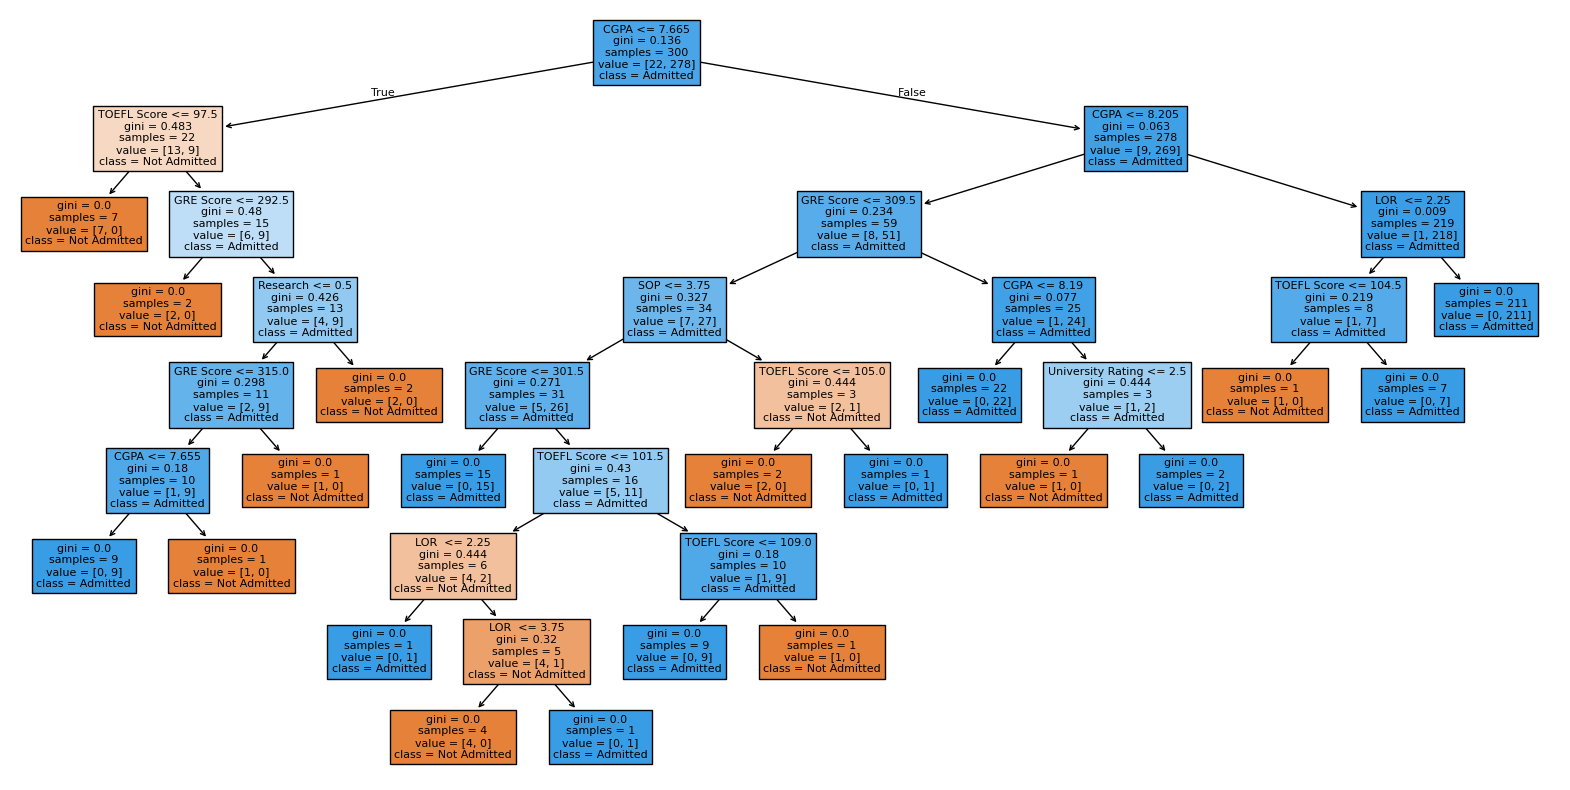

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=features, class_names=["Not Admitted","Admitted"], filled=True)
plt.show()
